## Diameter test


Cellpose version: 4.0.1 (major number: 4)


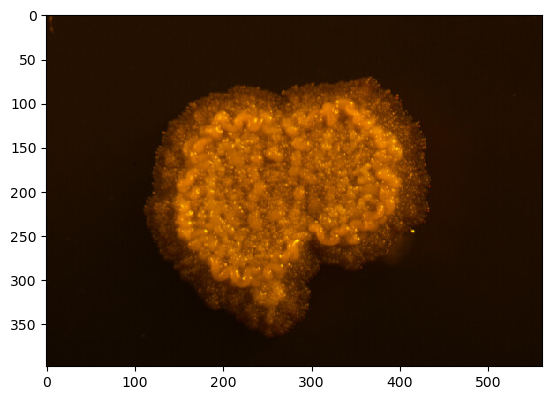

In [ ]:
import random
import os
from skimage.io import imread
import matplotlib.pyplot as plt
import cellpose
from cellpose import models, io

parent_folder = r"D:\images\tnia-python-images\imagesc\2025_09_09_large_biofilm"
name = 'image.tif'

name_without_extension = name.split('.')[0]
image = imread(os.path.join(parent_folder, name))

plt.imshow(image, cmap='gray')

major_number = cellpose.version.split('.')[0]
minor_number = cellpose.version.split('.')[1]
patch_number = cellpose.version.split('.')[2]

print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

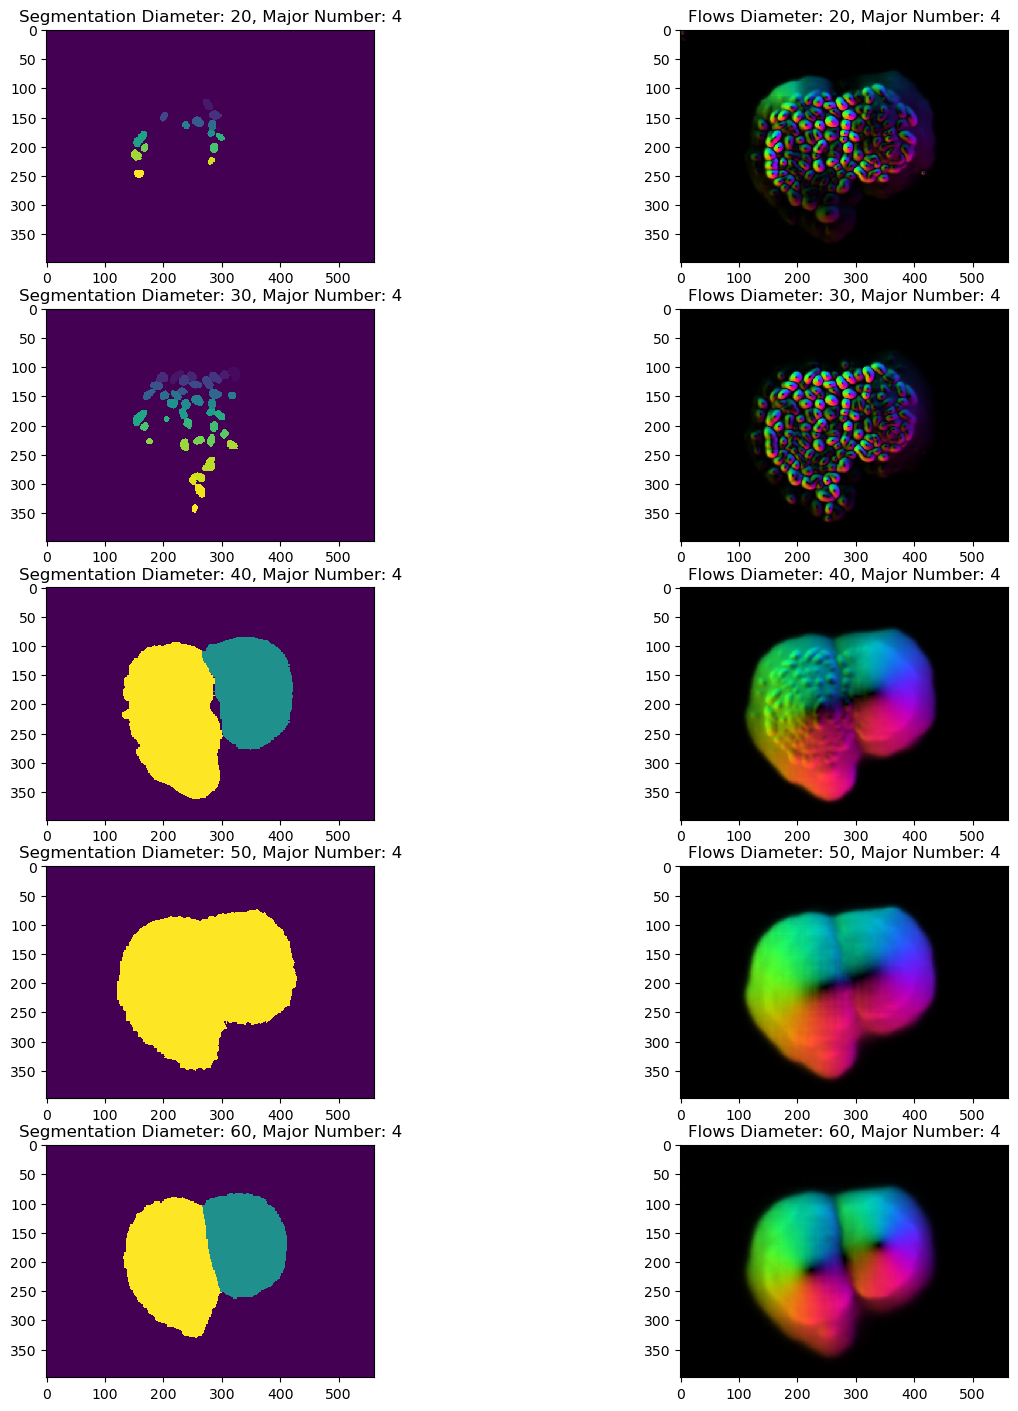

In [ ]:
if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto3')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)

niter = 2000
diameters = [20, 30, 40, 50, 60]

fig, axes = plt.subplots(len(diameters), 2, figsize=(15, len(diameters) * 3.5))

for row, d in enumerate(diameters):
    result = model.eval(image, diameter=d, niter=niter)


    axes[row,0].imshow(result[0])
    axes[row,0].set_title(f"Segmentation Diameter: {d}, Cellpose version: {major_number}")
    axes[row,1].imshow(result[1][0])
    axes[row,1].set_title(f"Flows Diameter: {d}, Cellpose version: {major_number}")

fig.savefig(os.path.join(parent_folder, f'cellpose_diameter_{name_without_extension}_{cellpose.version}_niter_{niter}.png'), dpi=300, bbox_inches='tight')

In [6]:

fig.savefig(os.path.join(parent_folder, f'cellpose_diameter_{name_without_extension}_{cellpose.version}_niter_{niter}.png'), dpi=300, bbox_inches='tight')